/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

dict_keys(['accuracy', 'loss'])
[0.5341625809669495, 0.3951294720172882, 0.35572147369384766, 0.3334102928638458, 0.3175329566001892]
[0.8130624890327454, 0.8577499985694885, 0.870437502861023, 0.879729151725769, 0.8859166502952576]


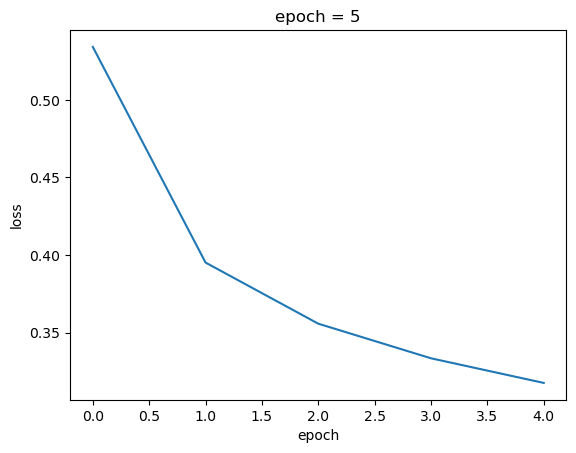

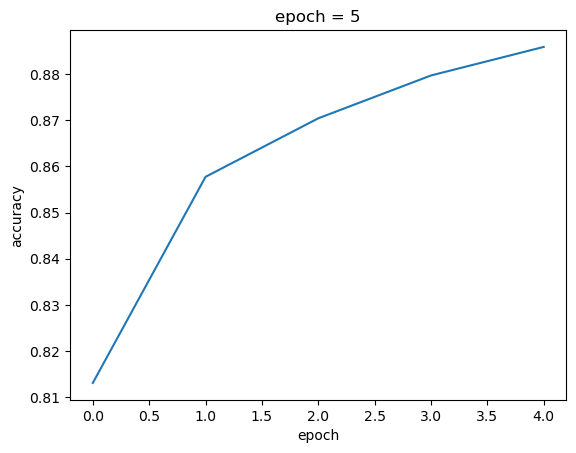

/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


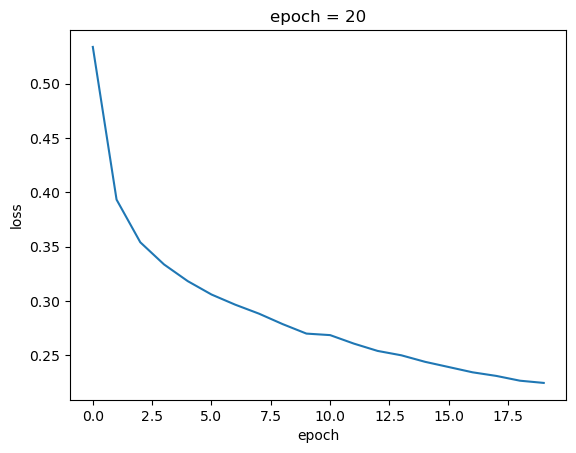

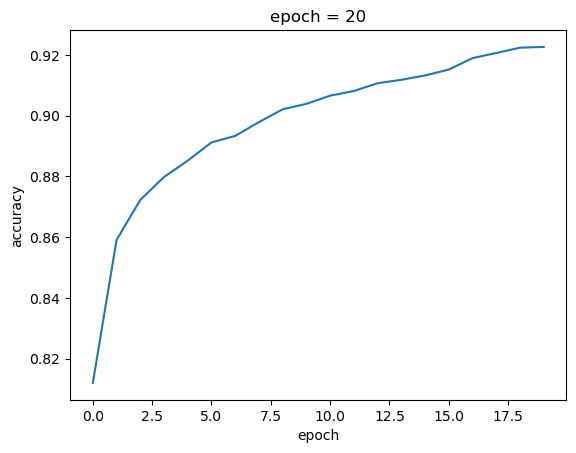

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

def model_fn(a_layer=None):
    model = keras.Sequential()    
    model.add(keras.layers.Flatten(input_shape=(28,28)))     #Iinput layer
    model.add(keras.layers.Dense(100, activation='relu'))    #Hidden layer
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))  #Output layer
    return model



#epoch is 5
model = model_fn()
model.summary()
model.compile (
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
print(history.history.keys())
print(history.history['loss'])
print(history.history['accuracy'])

import matplotlib.pyplot as plt
plt.figure()
plt.title('epoch = 5')
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

import matplotlib.pyplot as plt
plt.figure()
plt.title('epoch = 5')
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()



#epoch is 20
model = model_fn()
model.compile (
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

import matplotlib.pyplot as plt
plt.figure()
plt.title('epoch = 20')
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

import matplotlib.pyplot as plt
plt.figure()
plt.title('epoch = 20')
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.7639 - loss: 0.6719 - val_accuracy: 0.8552 - val_loss: 0.4100
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.8545 - loss: 0.4071 - val_accuracy: 0.8647 - val_loss: 0.3833
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.8737 - loss: 0.3520 - val_accuracy: 0.8618 - val_loss: 0.3964
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.8778 - loss: 0.3364 - val_accuracy: 0.8712 - val_loss: 0.3660
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.8868 - loss: 0.3152 - val_accuracy: 0.8736 - val_loss: 0.3654
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.8933 - loss: 0.2970 - val_accuracy: 0.8723 - val_loss: 0.3749
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.8959 - loss: 0.2924 - val_accuracy: 0.8769 - val_loss: 0.3677
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.8977 -

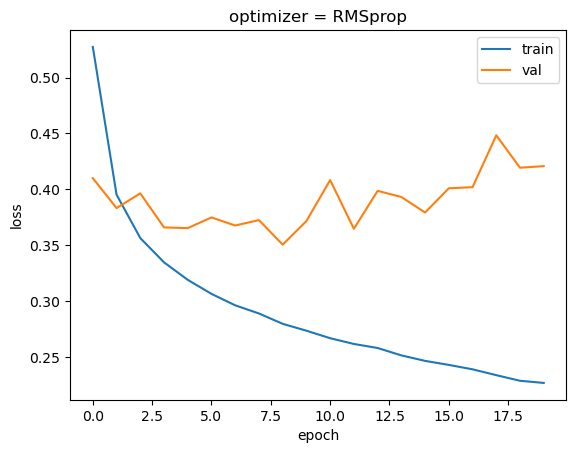

In [10]:
#Handle over fitting on NueralNetwork model
#find overfitting point - hyperparameter tunning (epoch)

model = model_fn()
model.compile (
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                   validation_data = (val_scaled, val_target))
print(history.history.keys())
print('evalueation score : ', model.evaluate(val_scaled, val_target))

plt.figure()
plt.title('optimizer = RMSprop')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
#혹은 plt.legend(['train', 'val'])
plt.show()

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 827us/step - accuracy: 0.7710 - loss: 0.6756 - val_accuracy: 0.8514 - val_loss: 0.4200
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.8540 - loss: 0.4126 - val_accuracy: 0.8450 - val_loss: 0.4406
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.8690 - loss: 0.3604 - val_accuracy: 0.8677 - val_loss: 0.3699
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.8792 - loss: 0.3310 - val_accuracy: 0.8702 - val_loss: 0.3644
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.8856 - loss: 0.3134 - val_accuracy: 0.8776 - val_loss: 0.3375
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.8951 - loss: 0.2912 - val_accuracy: 0.8832 - val_loss: 0.3300
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.8962 - loss: 0.2771 - val_accuracy: 0.8792 - val_loss: 0.3386
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - accuracy: 0.9015 -

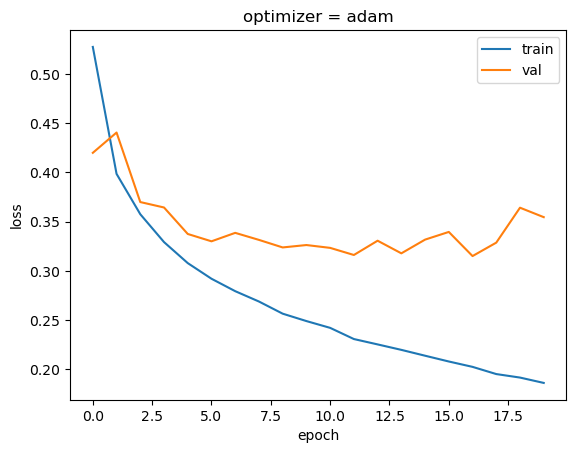

In [4]:
#Try handling overfitting by optimizer

model = model_fn()
model.compile (
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy'],
    optimizer = 'adam'
)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                   validation_data = (val_scaled, val_target))
print(history.history.keys())
print('evalueation score : ', model.evaluate(val_scaled, val_target))

plt.figure()
plt.title('optimizer = adam')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
#혹은 plt.legend(['train', 'val'])
plt.show()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 844us/step - accuracy: 0.7251 - loss: 0.7892 - val_accuracy: 0.8432 - val_loss: 0.4345
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.8366 - loss: 0.4542 - val_accuracy: 0.8555 - val_loss: 0.3928
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.8494 - loss: 0.4067 - val_accuracy: 0.8652 - val_loss: 0.3722
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.8606 - loss: 0.3829 - val_accuracy: 0.8730 - val_loss: 0.3514
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - accuracy: 0.8627 - loss: 0.3720 - val_accuracy: 0.8714 - val_loss: 0.3472
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.8691 - loss: 0.3546 - val_accuracy: 0.8696 - val_loss: 0.3549
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.8714 - loss: 0.3472 - val_accuracy: 0.8804 - val_loss: 0.3337
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.8752 -

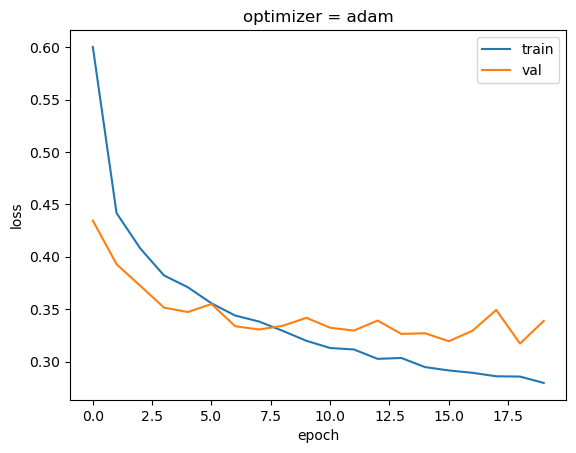

In [5]:
#Try handling overfitting by Dropout
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
model.compile (
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy'],
    optimizer = 'adam'
)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                   validation_data = (val_scaled, val_target))
print(history.history.keys())
print('evalueation score : ', model.evaluate(val_scaled, val_target))

plt.figure()
plt.title('optimizer = adam')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
#혹은 plt.legend(['train', 'val'])
plt.show()

In [19]:
#model store and restore
#Try handling overfitting by Dropout
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
model.compile (
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy'],
    optimizer = 'adam'
)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                   validation_data = (val_scaled, val_target))

model.save_weights('model-.weights.h5')
model.save('model-whole.h5')

!ls -al *.h5

model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-.weights.h5')


##store coefficients and restore
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))

##store model and restore
model = keras.models.load_model('model-whole.h5')  ##여기는 약간 저장해 놓은 모델 자체를 복원시켜서 model에다가 대입하는 느낌?
model.evaluate(val_scaled, val_target)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - accuracy: 0.7349 - loss: 0.7682 - val_accuracy: 0.8402 - val_loss: 0.4409
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - accuracy: 0.8379 - loss: 0.4569 - val_accuracy: 0.8562 - val_loss: 0.3951
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.8491 - loss: 0.4161 - val_accuracy: 0.8609 - val_loss: 0.3837
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.8606 - loss: 0.3822 - val_accuracy: 0.8576 - val_loss: 0.3913
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - accuracy: 0.8625 - loss: 0.3713 - val_accuracy: 0.8711 - val_loss: 0.3519
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.8705 - loss: 0.3537 - val_accuracy: 0.8752 - val_loss: 0.3439
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.8700 - loss: 0.3520 - val_accuracy: 0.8788 - val_loss: 0.3393
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.8741 -

-rw-r--r--  1 genius_hoon  staff  971928  7 13 13:38 model-.weights.h5
-rw-r--r--  1 genius_hoon  staff  971928  7 12 16:16 model-weights.weights.h5
-rw-r--r--  1 genius_hoon  staff  978584  7 13 13:38 model-whole.h5
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step
0.87975


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.8803 - loss: 0.3395


[0.34109655022621155, 0.8797500133514404]

In [33]:
## Use callback package!!!!!!!!

model = model_fn(keras.layers.Dropout(0.3))
model.compile (
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only = True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])
plt.figure()
plt


model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.8871 - loss: 0.3171


[0.31723570823669434, 0.8866666555404663]

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - accuracy: 0.8862 - loss: 0.3155
13


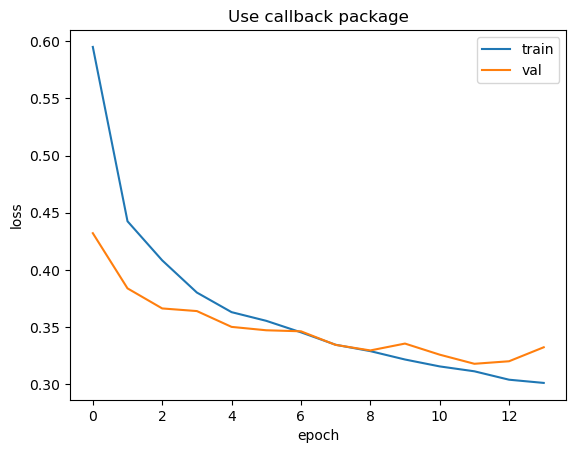

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.8862 - loss: 0.3155


[0.31786760687828064, 0.8840833306312561]

In [49]:
## Use ModelCheckPoint callback for find optimal epoch
## Use EarlyStopping callback for earlystop 


model = model_fn(keras.layers.Dropout(0.3))
model.compile (
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])


model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

print(early_stopping_cb.stopped_epoch)

plt.figure()
plt.title('Use callback package')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

model.evaluate(val_scaled, val_target)